# Data Understanding

### Import Dataset

In [2]:
# Import Linraries
import pandas as pd

In [21]:
# Import Data
df = pd.read_csv(r"c:\Users\jiunj\Documents\Campus Document\Year 3\FYP\FYP NULL\Dataset\SteamReview_Backup.csv")

In [52]:
df_overall = pd.read_csv(r"c:\Users\jiunj\Documents\Campus Document\Year 3\FYP\FYP NULL\Dataset\player_reviews_100K_preprocessed_Set1_Half.csv")

### Check Data Type & Column Name

In [41]:
# Check data types of each column
print(df.dtypes)

review_text    object
dtype: object


### Check The Data for Each Column

In [21]:
# Check column data values
print(df.head)

<bound method NDFrame.head of          app_id        app_name  \
0            10  Counter-Strike   
1            10  Counter-Strike   
2            10  Counter-Strike   
3            10  Counter-Strike   
4            10  Counter-Strike   
...         ...             ...   
6417101   99910  Puzzle Pirates   
6417102   99910  Puzzle Pirates   
6417103   99910  Puzzle Pirates   
6417104   99910  Puzzle Pirates   
6417105   99910  Puzzle Pirates   

                                               review_text  review_score  \
0                                          Ruined my life.             1   
1        This will be more of a ''my experience with th...             1   
2                            This game saved my virginity.             1   
3        • Do you like original games? • Do you like ga...             1   
4                 Easy to learn, hard to master.                       1   
...                                                    ...           ...   
6417101  I really

### Check Missing Data

In [22]:
#Check Null Value For df
print(df.isnull().sum())

app_id               0
app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64


### Check Duplicate

In [23]:
#Check duplicate value
print("Total duplicate value: {}".format(df.duplicated().sum()))

Total duplicate value: 1796102


### Check Steam Review Length

In [ ]:
#Install Library
!pip install matplotlib

In [25]:
import matplotlib.pyplot as plt

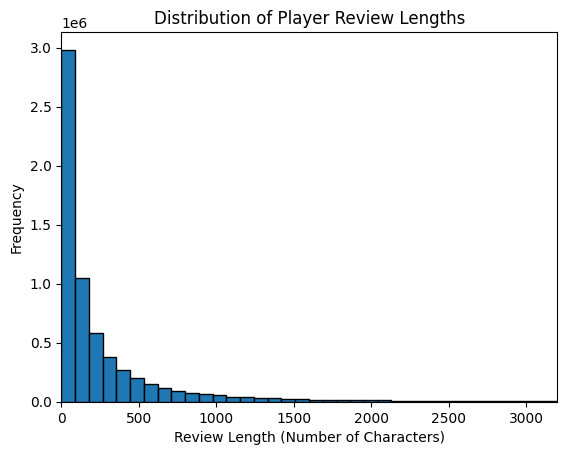

In [26]:
#Check the Distribution of Steam Review Length
# Calculate the review_length length
df['review_text'] = df['review_text'].astype(str)
df['review_length'] = df['review_text'].apply(len)

# Plot a histogram for player review length for teraria review
plt.hist(df['review_length'], bins=100, edgecolor='black') # Set the display of the plot
plt.title('Distribution of Player Review Lengths') # Set title
plt.xlabel('Review Length (Number of Characters)') # Set x-axis title
plt.ylabel('Frequency') # Set y-axis title
plt.xlim(0, 3200)  # Adjust the range as needed
plt.show()

# Data Pre-Processing

### Remove Missing Data

In [22]:
#Remove null value
df = df.dropna()

#Check null value
print("Null Value:")
print(df.isnull().sum())

Null Value:
app_id          0
app_name        0
review_text     0
review_score    0
review_votes    0
dtype: int64


### Remove Duplicate Data

In [23]:
# Remove duplicate data
df = df.drop_duplicates()
print("Total duplicate value: {}".format(df.duplicated().sum()))

Total duplicate value: 0


### Convert Player Review to Lowercase

In [24]:
#Convert all the review text into lower case 
df['review_text'] = df['review_text'].str.lower()

#Check the result
print(df['review_text'].head())

0                                      ruined my life.
1    this will be more of a ''my experience with th...
2                        this game saved my virginity.
3    • do you like original games? • do you like ga...
4             easy to learn, hard to master.          
Name: review_text, dtype: object


### Remove Unwanted Columns

In [25]:
#Remove unwanted column
df = df[['app_name', 'review_text', 'review_score']]

### Remove Extra Whitespace

In [26]:
df['review_text'] = df['review_text'].str.strip()

### Filter Review Length Between 20-150

In [27]:
#Create new column that calculate the review length
df['review_length'] = df['review_text'].apply(len)

#Filter Review Length Between 20 -150
df = df[(df['review_length'] >= 20) & (df['review_length'] <= 150)]

In [28]:
min_length = df['review_text'].str.len().min()
max_length = df['review_text'].str.len().max()

print(f"Minimum review length: {min_length}")
print(f"Maximum review length: {max_length}")

Minimum review length: 20
Maximum review length: 150


### Remove Numeric Data In review

In [29]:
# Remove Numeric Data
df['review_text'] = df['review_text'].str.replace(r'\d+', '', regex=True)

### Remove Emoji

In [30]:
pip install emoji


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\jiunj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
import emoji
import re

In [32]:
# Function to check if a review contains emojis
def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in text)

# Filter reviews that STILL contain emojis
df_with_emoji = df[df['review_text'].apply(contains_emoji)]

# Display reviews with emojis
print(df_with_emoji)


               app_name                                        review_text  \
41       Counter-Strike  / would get 'fire in the hole' tattooed on my ...   
52       Counter-Strike  -no lag -no russian guy saying ♥♥♥♥ ♥♥♥♥♥ -cla...   
91       Counter-Strike  the st and best game i ever played in my entir...   
197      Counter-Strike  ♥♥♥♥ing nostalgic m. best sound n/a. best grap...   
286      Counter-Strike                        mother♥♥♥♥ing ♥♥♥♥♥♥♥t game   
...                 ...                                                ...   
6417040  Puzzle Pirates  hitting your face against a brick wall covered...   
6417042  Puzzle Pirates  worst game ♥♥♥♥ing ever anyone who plays this ...   
6417065  Puzzle Pirates  if you have a hankerin for a pc game that abso...   
6417066  Puzzle Pirates     ♥♥♥♥ this gay ♥♥♥♥ piece of ♥♥♥♥ nigger ♥♥♥♥♥♥   
6417071  Puzzle Pirates  gaming at its finest............. if you like ...   

         review_score  review_length  
41                  1   

In [33]:
# Function to remove emojis, including ZWJ sequences
def remove_emojis(text):
    emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002600-\U000026FF\U00002700-\U000027BF\U00002B50-\U00002B55\U0001F1E6-\U0001F1FF]+", flags=re.UNICODE)
    return emoji_pattern.sub("", text)

# Apply to the DataFrame column
df['review_text'] = df['review_text'].apply(remove_emojis)


In [34]:
# Function to check if a review contains emojis
def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in text)

# Filter reviews that STILL contain emojis
df_with_emoji = df[df['review_text'].apply(contains_emoji)]

# Display reviews with emojis
print(df_with_emoji)


                                    app_name  \
739                           Counter-Strike   
8921                          Counter-Strike   
22425    3D Ultra Minigolf Adventures Deluxe   
24563         Call of Duty: Modern Warfare 2   
24996         Call of Duty: Modern Warfare 2   
...                                      ...   
6409051                     Star Trek Online   
6412762                         Renegade Ops   
6412859                         Blade Kitten   
6412985                         Blade Kitten   
6413129                         Blade Kitten   

                                               review_text  review_score  \
739                                   call of duty™ ripoff             1   
8921                 officially endorsed by seung-hui cho©             1   
22425    min of gameplay         youtube™ video:  min o...             1   
24563           more innovative than the new call of duty®             1   
24996      youtube™ video:  duty calls - pl

### Sampling 100K Review

In [35]:
# Ramdom Sampling Data
df_overall = df.sample(n=100000, random_state=38)
print(df_overall.head())

                            app_name  \
2128278                      Outlast   
2602588  Battlefield: Bad Company™ 2   
1808555                     Warframe   
526934                   Tomb Raider   
1009296            Mark of the Ninja   

                                               review_text  review_score  \
2128278  i suspect this game will take me some time to ...             1   
2602588                           this is a very good game             1   
1808555  being a ninja in space is a dream that hardly ...             1   
526934   really great game! finished it in only  days, ...             1   
1009296  the gameplay is awsome and i love how simple i...             1   

         review_length  
2128278            134  
2602588             24  
1808555            130  
526934             132  
1009296             90  


In [36]:
print("Overall Review Shape: ", df_overall.shape)

Overall Review Shape:  (100000, 4)


### Remove Special Character and Punctuation

In [37]:
#Handle Special Characters and Punctuation
def Remove_Special_Characters_and_Punctuation(Review):
    Review_Removed_Special_Characters_and_Punctuation = re.sub('\W+', ' ', Review)
    return Review_Removed_Special_Characters_and_Punctuation

#Apply the Remove_Special_Characters_and_Punctuation function
df_overall['review_text'] = df_overall['review_text'].apply(Remove_Special_Characters_and_Punctuation)

### Spelling Correction (SpellChecker)

In [43]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\jiunj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
from spellchecker import SpellChecker

In [56]:
df_overall['review_text'] = df_overall['review_text'].astype(str)

In [57]:
# Initialize the SpellChecker
spell_checker = SpellChecker()

# Handle Spelling Correction
def Check_Spelling(Review):
    words = Review.split()  # Split sentence into words
    corrected_words = [spell_checker.correction(word) or word for word in words]  # Correct each word
    return " ".join(corrected_words)  # Join words back into a sentence

# Apply the Check_Spelling function
df_overall['review_text'] = df_overall['review_text'].apply(Check_Spelling)

### Removing Stop Words

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
#Remove stop word
Stop_Word = set(stopwords.words('english'))

def Remove_Stop_Word(Review):
    Tokens = word_tokenize(Review)
    Review_Removed_Stop_Word = []
    for token in Tokens:
        if token not in Stop_Word:
            Review_Removed_Stop_Word.append(token)
    return " ".join(Review_Removed_Stop_Word)


#Apply the Remove_Stop_Word function
df_overall['preprocess_review_text'] = df_overall['review_text'].apply(Remove_Stop_Word)

### Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
#Lemmatization Using WordNetLemmatizer and Pos Tag
lemmatizer = WordNetLemmatizer()

#Get Word Pos Tag Function
def Get_Pos_Tag(word):
    tag = nltk.pos_tag([word])
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    Pos_Tag = tag_dict.get(tag[0][1][0].upper(), wordnet.NOUN)
    return Pos_Tag
    
#Lemmatization Function
def Lemmatization(Review):
    Tokens = word_tokenize(Review)
    Review_Lemmatize = []
    for token in Tokens:
        Review_Lemmatize.append(lemmatizer.lemmatize(token, pos = Get_Pos_Tag(token)))
    return " ".join(Review_Lemmatize)

#Apply the Lemetization function
df_overall['preprocess_review_text'] = df_overall['preprocess_review_text'].apply(Lemmatization)

# Build K-Means Clustering Model

### Import Library

In [16]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

### Create Embow Method Function

In [18]:
# Elbow Method Function
def elbow_method(player_review_vec, max_k):
    inertia = []  # To store inertia value
    k_values = range(1, max_k + 1)

    # Compute KMeans for each K value
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(player_review_vec)

        # calculate inertia
        inertia.append(kmeans.inertia_)

    # Plot the inertia results
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('inertia')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.show()

#### Tokenization

In [19]:
# Define new variable that store the overall 100K preporcesses review text
player_review_overall = df_overall['preprocess_review_text']

# Set up the TF-IDF vextorizer
vectorizer_overall = TfidfVectorizer()

# Transfer the player review in to numeric form 
player_review_overall_vectorize = vectorizer_overall.fit_transform(player_review_overall)

### Apply Elbow Method Function

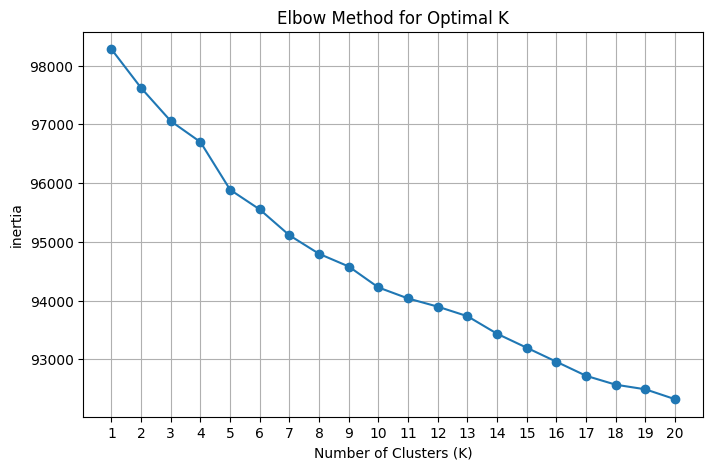

In [ ]:
# Calculate optimal k for overall player review data frame.
elbow_method(player_review_overall_vectorize, 20)   

### Train K-Means Clustering Model

In [ ]:
# Build clustering model with K-Means algorithm (Overall Review) 
k = 8
model_overall = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=20)
model_overall.fit(player_review_overall_vectorize)

## Cluster Visualization

### Retrive Top 10 Key Word for Each Cluster

In [17]:
# Check Keyword For Overall Clustering Model
print("Cluster centroids: \n")
Cluster = model_overall.cluster_centers_.argsort()[:, ::-1]
Gain_Keywords = vectorizer_overall.get_feature_names_out()  # Set a function to gain keyword from cluster

for i in range(k):
    print("Cluster",i)
    for keyword in Cluster[i, :10]:
        print(Gain_Keywords[keyword])
    print('-------------------')

Cluster centroids: 

Cluster 0
like
game
play
really
fun
good
feel
get
great
love
-------------------
Cluster 1
game
play
get
love
would
buy
well
amaze
time
make
-------------------
Cluster 2
great
game
story
play
fun
love
recommend
time
gamelan
graphic
-------------------
Cluster 3
good
game
really
pretty
play
fun
story
get
time
graphic
-------------------
Cluster 4
best
ever
game
one
played
time
make
play
far
ups
-------------------
Cluster 5
awesome
game
play
love
fun
recommend
really
great
get
story
-------------------
Cluster 6
hour
game
play
fun
played
get
spent
great
many
good
-------------------
Cluster 7
fun
game
play
friend
really
lot
much
get
time
recommend
-------------------


Cluster 0: Positive Vibes
Cluster 1: Worth Buying
Cluster 2: Story & Graphics
Cluster 3: Well-Rounded
Cluster 4: All-Time Best
Cluster 5: Top Picks
Cluster 6: Long Sessions
Cluster 7: Multiplayer Fun

In [21]:
# Define a new cluster variable to store the number of clusters for each review
df_overall['cluster'] = model_overall.labels_

#Check Topic Distribution For df_overall
print(df_overall['cluster'].value_counts())

cluster
1    57358
7     8035
2     7654
0     7653
3     7160
4     6027
5     3412
6     2701
Name: count, dtype: int64


# Export Data

In [39]:
# Export data as csv file (Ready for Build a Bert Model)
df_overall.to_csv('player_reviews_100K_preprocessed_Set2.csv', index=False)